Found 4478 files belonging to 44 classes.
Using 3583 files for training.
Found 4478 files belonging to 44 classes.
Using 895 files for validation.
Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 55s 275ms/step - loss: 4.1156 - sparse_categorical_accuracy: 0.1590 - val_loss: 2.3922 - val_sparse_categorical_accuracy: 0.4089
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 2.1408 - sparse_categorical_accuracy: 0.4429 - val_loss: 2.0167 - val_sparse_categorical_accuracy: 0.4592
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - loss: 1.6652 - sparse_categorical_accuracy: 0.5475 - val_loss: 1.6847 - val_sparse_categorical_accuracy: 0.5508
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - loss: 1.3929 - sparse_categorical_accuracy: 0.6111 - val_loss: 1.4490 - val_sparse_categorical_accuracy: 0.5721
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - loss: 1.1248 - sparse_categorical_accuracy: 0.6772 - val_loss: 1.3124 - val_sparse_categorical_accuracy: 0.6156
Epoch 6/20
112/1

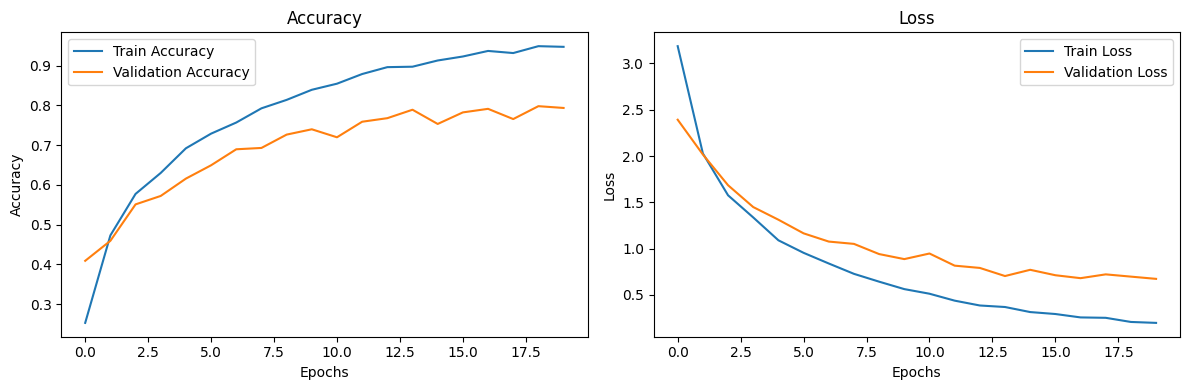

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

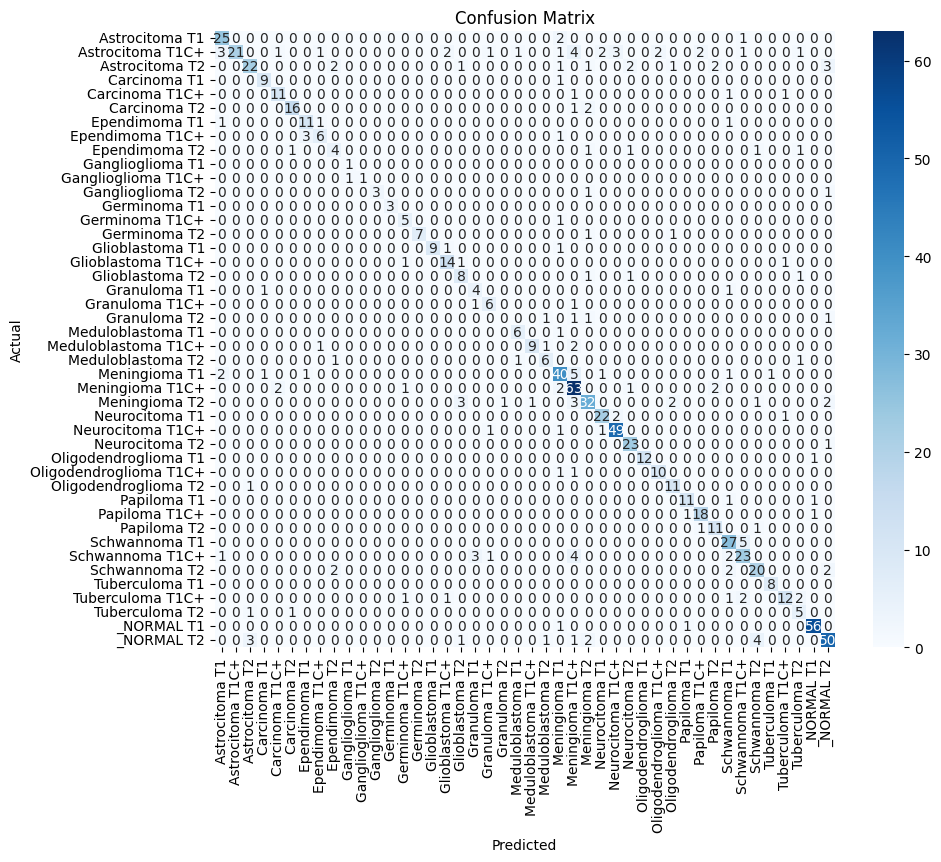

Weighted F1 Score: 0.7896


In [12]:
import tensorflow as tf
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet169

# Load the dataset (same as before)
data_dir = '/kaggle/input/brain-tumor-mri-images-44c'  # Change to your dataset path
batch_size = 32
img_height = 224
img_width = 224

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


# Build the model using DenseNet169 (same as before)
base_model = DenseNet169(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(44, activation='softmax')
])

# Compile the model (same as before)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

# Train the model
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Step 1: Plot accuracy and loss
def plot_history(history):
    # Accuracy
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history)

# Step 2: Confusion Matrix
val_labels = []
val_preds = []

for images, labels in val_ds:
    preds = model.predict(images)
    val_labels.extend(labels.numpy())
    val_preds.extend(np.argmax(preds, axis=1))

# Generate confusion matrix
cm = confusion_matrix(val_labels, val_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_ds.class_names, yticklabels=train_ds.class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

f1 = f1_score(val_labels, val_preds, average='weighted')
print(f'Weighted F1 Score: {f1:.4f}')


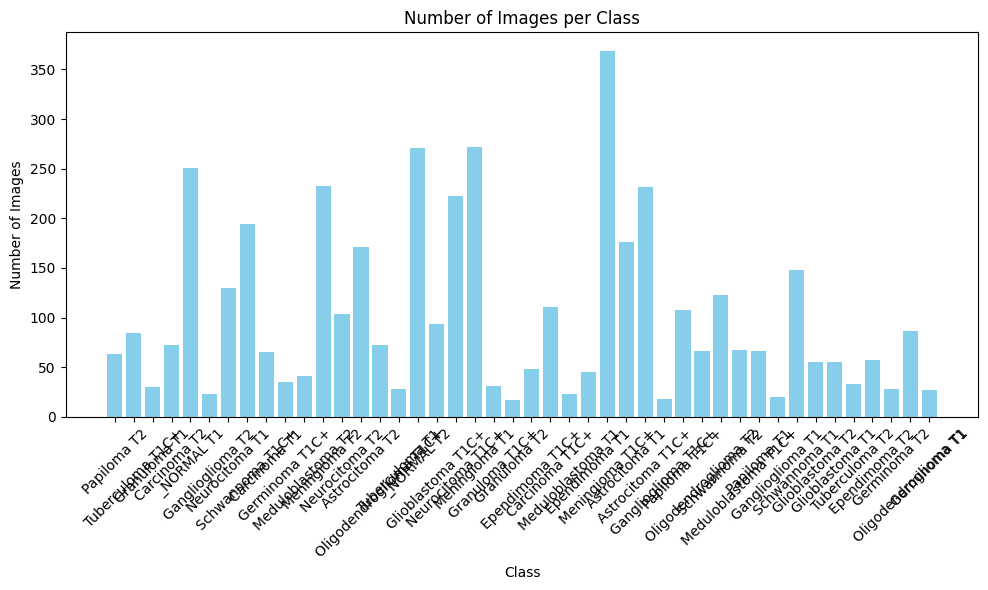

In [9]:
import os
import matplotlib.pyplot as plt

# Step 1: Define the data directory
data_dir = '/kaggle/input/brain-tumor-mri-images-44c'  # Change to your dataset path

# Step 2: Count the images in each class folder
class_counts = {}
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len([name for name in os.listdir(class_path) if name.endswith('.jpeg') or name.endswith('.jpg')])

# Step 3: Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
